In [54]:
import pandas as pd
df = pd.read_csv("debateT.csv")
def switch(df):
    if (df.Result=="Neg"):
        return 0
    else:
        return 1
df["Result Numeric"] = df.apply(lambda row:switch(row), axis=1)
df

,Affirmative,Negative,Judge,Result,Result Numeric
0,Meadows HY,Berkeley Prep ZK,Jason Young,Neg,0
1,Mamaroneck BO,Georgetown Day MW,Jake Lee,Aff,1
2,Liberal Arts and Science MC,West HS SLC GR,Misty Tippets,Neg,0
3,Liberal Arts and Science BR,Lane Tech NP,Cade Cottrell,Aff,1
4,Maine East PP,Westside KS,Rishi Mukherjee,Aff,1
...,...,...,...,...,...
85,Westside KS,Liberal Arts and Science MC,Alaina Walberg,Neg,0
86,Lane Tech NP,Mamaroneck BO,Terrell Taylor,Neg,0
87,West HS SLC GR,Maine East PP,Dustin Meyers-Levy,Aff,1
88,Berkeley Prep ZK,Cypress Bay LL,Donny Peters,Aff,1


In [55]:
a = len(df[(df.Result=="Aff")])
print("Number of Judges Voting Aff: " + str(a))

b = len(df[(df.Result=="Neg")])
print("Number of Judges Voting Neg: " + str(b))

Number of Judges Voting Aff: 47
Number of Judges Voting Neg: 43


$\mu$ = 0.5 (chance of judge voting neg = chance of judge voting aff)

Null Hypothesis: chance of judge voting aff = $\mu$

Alternative Hypothesis: chance of judge voting aff > $\mu$


In [56]:
result_mean = df["Result Numeric"].mean()
print("result_mean: " + str(result_mean))

sample_size = len(df)
print("sample_size: " + str(sample_size))

result_mean: 0.5222222222222223
sample_size: 90


In [60]:
# alpha is 5%

import scipy.stats
from scipy.stats import binomtest
result = scipy.stats.binomtest(47, n=sample_size, p=0.5, alternative="greater")
p_value = result.pvalue

print("p-value is " + str(p_value))

p-value is 0.3760166007992975


Interpretation: The p-value is greater than 5%. Thus, we do not have enough evidence to reject the null hypothesis. 

<AxesSubplot:xlabel='Result'>

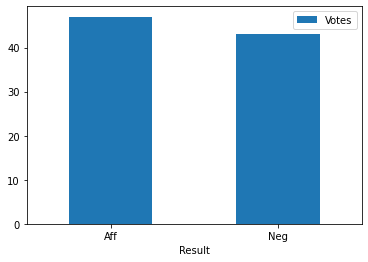

In [65]:
df2 = pd.DataFrame({"Result":["Aff", "Neg"], "Votes":[47, 43]})
df2.plot.bar(x="Result", y="Votes", rot=0)